# Synthetic data

In [1]:
!pwd
import os
# os.chdir('..') # for server this isnt reqd
from bilevel.synth_datagen import SynthGenLinear

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/jupyter-kriach/md_github_lat/multigroupcode/multigroup-code


In [2]:
import pickle
def save_ob(name, obj):
    with open(name, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_ob(name):
    with open(name, 'rb') as handle:
        obj = pickle.load(handle)
    return obj

In [3]:
def performance_diff(ds_obj):
    df_res = pd.concat([ds_obj.df_base_meansd, ds_obj.df_Anh_meansd], axis=1)
    df_res['base_minus_Anh'] = df_res['mean_base'] - df_res['mean_Anh']
    df_res['discount_from_base'] = (df_res['base_minus_Anh'] / df_res['mean_base'])*100
    return df_res

In [4]:
# call only one time, used the saved syn_ob below
# params = {'samples': 100000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
#         'add_linear_mapping': True, 'add_quad_mapping' : False, 
#         'S_lo': 0.0, 'S_hi':0.0,
#         'label_noise_width':0.16, 'drop_sensitive':False, 'fixed_seed':42,
#         }
# syn_ob = SynthGenLinear(**params)
# print(syn_ob.dperm, np.array(syn_ob.all_groupnames)[syn_ob.dperm])
# df = syn_ob.df

[0 7 6 1 3 5 2 4] ['male' 'native-am' 'asian' 'female' 'black' 'some-other' 'white'
 'two-or-more']


In [6]:
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SHAPE':['circle', 'square', 'triangle'], 'COLOR': ['green', 'red', 'blue'], 'TEXTURE':['rough', 'smooth']},
        'prob_dict': {'SHAPE': [0.5, 0.3, 0.2], 'COLOR': [0.6, 0.3, 0.1], 'TEXTURE': [0.6, 0.4]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
        'add_linear_mapping': True, 'add_quad_mapping' : False,
        'S_lo': 0.0, 'S_hi':0.0,
        'label_noise_width':0.16, 'drop_sensitive':False, 'fixed_seed':42,
        }
syn_ob = SynthGenLinear(**params)
print(syn_ob.dperm, np.array(syn_ob.all_groupnames)[syn_ob.dperm])
df = syn_ob.df

[0 7 6 1 3 5 2 4] ['circle' 'smooth' 'rough' 'square' 'green' 'blue' 'triangle' 'red']


In [7]:
save_ob('syn_ob_neutral_altprob.pickle', syn_ob)

In [4]:
# import pickle
# with open('syn_ob_saved.pickle', 'wb') as handle:
#     pickle.dump(syn_ob, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
# import pickle
# with open('syn_ob_saved.pickle', 'rb') as handle:
#     syn_ob = pickle.load(handle)
# print(syn_ob.dperm, np.array(syn_ob.all_groupnames)[syn_ob.dperm])
# df = syn_ob.df

[3 0 5 7 2 4 1 6] ['black' 'male' 'some-other' 'native-am' 'white' 'two-or-more' 'female'
 'asian']


In [9]:
print(df.columns)
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_circle', 'g_square', 'g_triangle', 'g_green', 'g_red',
       'g_blue', 'g_rough', 'g_smooth', 'y_circle', 'y_square', 'y_triangle',
       'y_green', 'y_red', 'y_blue', 'y_rough', 'y_smooth', 'y_mean_active',
       'y_min_active', 'y_max_active', 'y_dperm_active'],
      dtype='object')
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_circle', 'y_square', 'y_triangle', 'y_green', 'y_red', 'y_blue', 'y_rough', 'y_smooth', 'y_mean_active', 'y_min_active', 'y_max_active', 'y_dperm_active'] ['g_circle', 'g_square', 'g_triangle', 'g_green', 'g_red', 'g_blue', 'g_rough', 'g_smooth']


## Note about features and labels
- x_0...x_19 are the features, y_mean, min, max, dperm are the labels
- also include group membership in features!, group memberships are
    Race groups, Sex groups

In [10]:
syn_ob.A_t.shape

(100000, 8)

In [11]:
syn_ob.A_t.sum(axis=0), syn_ob.all_groupnames

(array([49934., 30063., 20003., 59890., 30063., 10047., 59927., 40073.]),
 ['circle', 'square', 'triangle', 'green', 'red', 'blue', 'rough', 'smooth'])

In [12]:
A_t = pd.DataFrame(syn_ob.A_t, columns = syn_ob.all_groupnames) # A_t dataframe
A_t['always_on'] = 1

In [14]:
A_t.sum(axis=0)

circle        49934.0
square        30063.0
triangle      20003.0
green         59890.0
red           30063.0
blue          10047.0
rough         59927.0
smooth        40073.0
always_on    100000.0
dtype: float64

In [15]:
df_mean = df[filter_feature + filter_group + ['y_mean_active']]
df_min = df[filter_feature + filter_group + ['y_min_active']]
df_max = df[filter_feature + filter_group + ['y_max_active']]
df_dperm = df[filter_feature + filter_group + ['y_dperm_active']]

In [17]:
df_mean.shape,df_min.shape, df_max.shape,df_dperm.shape, len(filter_feature+filter_group)

((100000, 29), (100000, 29), (100000, 29), (100000, 29), 28)

In [18]:
from bilevel.Groupwise_seedruns import BuildGroupwise_diffseeds

## y_mean

In [19]:
%%time
ds_ymean = BuildGroupwise_diffseeds(df_mean, 'y_mean_active', A_t) # different seeds object
ds_ymean.build_all_seeds()
ds_ymean.build_df_res()
ds_ymean.build_regret_curve()

100%|██████████| 100000/100000 [00:18<00:00, 5493.79it/s]


CPU times: user 7min 49s, sys: 11 s, total: 8min
Wall time: 4min 2s


In [20]:
save_ob('syn_ymean_altprob.pickle', ds_ymean)

In [7]:
from bilevel.Groupwise_seedruns import plot_subgroups
# plot_subgroups(ds_ob, subgroups_list)

In [7]:
# from bilevel.Groupwise_seedruns import plot_regret_curve_with_std
# plot_regret_curve_with_std(ds_ymean)

## y_min

In [21]:
%%time
ds_ymin = BuildGroupwise_diffseeds(df_min, 'y_min_active', A_t) # different seeds object
ds_ymin.build_all_seeds()
ds_ymin.build_df_res()
ds_ymin.build_regret_curve()

100%|██████████| 100000/100000 [00:18<00:00, 5486.14it/s]


CPU times: user 7min 52s, sys: 10.5 s, total: 8min 2s
Wall time: 4min 5s


In [22]:
save_ob('syn_ymin_altprob.pickle', ds_ymin)

In [19]:
# pd.concat([ds_ymin.df_base_meansd, ds_ymin.df_Anh_meansd], axis=1)

## y_max

In [23]:
ds_ymax = BuildGroupwise_diffseeds(df_max, 'y_max_active', A_t) # different seeds object
ds_ymax.build_all_seeds()
ds_ymax.build_df_res()
ds_ymax.build_regret_curve()

100%|██████████| 100000/100000 [00:18<00:00, 5431.09it/s]


In [24]:
save_ob('syn_ymax_altprob.pickle', ds_ymax)

## y_dperm

In [25]:
ds_ydperm = BuildGroupwise_diffseeds(df_dperm, 'y_dperm_active', A_t) # different seeds object
ds_ydperm.build_all_seeds()
ds_ydperm.build_df_res()
ds_ydperm.build_regret_curve()

100%|██████████| 100000/100000 [00:18<00:00, 5515.66it/s]


In [26]:
save_ob('syn_ydperm_altprob.pickle', ds_ydperm)

In [26]:
ds_ydperm.regret_Base_groupwise_array[-1].mean(axis=0), ds_ydperm.regret_Anh_groupwise_array[-1].mean(axis=0)

(array([0.85727303, 0.90996205, 0.94130017, 0.96304128, 0.97831962,
        0.99068605, 1.00150989, 1.01272009, 1.01905923, 1.02802273,
        1.03725283, 1.04288441, 1.04486531, 1.05188583, 1.06046654,
        1.06044642, 1.06397765, 1.07015263, 1.07317743, 1.07514805,
        1.08109021, 1.08737693, 1.0844914 , 1.08830775, 1.09403315,
        1.09298502, 1.09565634, 1.09742047, 1.10195339, 1.10353976,
        1.10642593, 1.10701132, 1.11102893, 1.11256725, 1.11603158,
        1.11605028, 1.12060841, 1.12155286, 1.12143754, 1.12242088,
        1.12391887, 1.12639141, 1.12797421, 1.12992692, 1.13092014,
        1.13308399, 1.13560346, 1.13629761, 1.13765507, 1.13774009,
        1.14246452, 1.14068999, 1.14310439, 1.14576694, 1.1449261 ,
        1.14764081, 1.14822804, 1.14825322, 1.14939895, 1.15168177,
        1.15226063, 1.15327986, 1.15360418, 1.15575501, 1.15624894,
        1.158441  , 1.15974194, 1.1609081 , 1.1602347 , 1.16158934,
        1.16161414, 1.16431952, 1.16483641, 1.16

## checks which aggregation is the best for Anh

In [27]:
performance_diff(ds_ymean)

,mean_base,std_base,mean_Anh,std_Anh,base_minus_Anh,discount_from_base
circle,33.494734,0.188104,24.111782,0.229021,9.382952,28.013215
square,22.609174,0.183323,14.980702,0.178711,7.628472,33.740603
triangle,19.687635,0.135289,11.172674,0.109005,8.514961,43.250299
green,37.944748,0.115058,26.092344,0.211229,11.852404,31.235954
red,25.025245,0.147233,17.028175,0.187769,7.997070,31.956011
blue,12.821551,0.058277,7.144640,0.118810,5.676911,44.276319
rough,43.580828,0.193940,28.771920,0.263574,14.808908,33.980327
smooth,32.210716,0.180749,21.493239,0.278931,10.717477,33.273017
always_on,75.791544,0.048489,50.265159,0.268916,25.526385,33.679727


In [28]:
performance_diff(ds_ymin)

,mean_base,std_base,mean_Anh,std_Anh,base_minus_Anh,discount_from_base
circle,141.912945,0.444123,86.413952,0.706299,55.498992,39.107773
square,99.891018,0.446531,43.360495,0.262168,56.530523,56.592198
triangle,51.072475,0.232898,35.564103,0.370342,15.508371,30.365420
green,139.854670,0.424550,88.344620,0.561217,51.510049,36.831126
red,106.961597,0.556744,49.074544,0.174538,57.887053,54.119473
blue,46.060170,0.183587,27.919386,0.174007,18.140784,39.384970
rough,185.519570,0.194985,98.651750,0.439884,86.867821,46.824074
smooth,107.356867,0.184684,66.686801,0.365971,40.670066,37.883060
always_on,292.876437,0.066336,165.338551,0.456665,127.537886,43.546653


In [29]:
performance_diff(ds_ymax)

,mean_base,std_base,mean_Anh,std_Anh,base_minus_Anh,discount_from_base
circle,76.847733,0.450936,49.605079,0.192237,27.242654,35.450172
square,57.142333,0.294241,36.663329,0.125851,20.479004,35.838585
triangle,36.574547,0.177325,25.481899,0.145769,11.092648,30.328873
green,96.894971,0.125421,63.176055,0.193795,33.718916,34.799449
red,55.561746,0.140541,34.856393,0.169990,20.705353,37.265483
blue,18.107896,0.050332,13.717861,0.190536,4.390036,24.243764
rough,75.825463,0.482030,54.041680,0.304597,21.783783,28.728850
smooth,94.739150,0.452727,57.708628,0.369285,37.030522,39.086821
always_on,170.564613,0.071068,111.750308,0.209658,58.814305,34.482126


In [30]:
performance_diff(ds_ydperm)

,mean_base,std_base,mean_Anh,std_Anh,base_minus_Anh,discount_from_base
circle,122.283852,1.112594,25.825243,0.167210,96.458609,78.880905
square,94.369627,0.699002,36.575021,0.116563,57.794607,61.242805
triangle,62.324181,0.430190,24.559329,0.082345,37.764852,60.594221
green,166.792320,0.150048,52.195927,0.203844,114.596393,68.706037
red,83.644437,0.135781,25.828186,0.176485,57.816251,69.121454
blue,28.540903,0.060170,8.935479,0.196590,19.605424,68.692375
rough,141.711030,0.648412,45.237011,0.376275,96.474019,68.077989
smooth,137.266630,0.614417,41.722582,0.279008,95.544048,69.604716
always_on,278.977660,0.062967,86.959593,0.141057,192.018068,68.829191


In [31]:
# also check that df mean, min, max, dperm are same except ycol

In [33]:
from bilevel.Groupwise_seedruns import plot_regret_curve_with_std

circle 49934


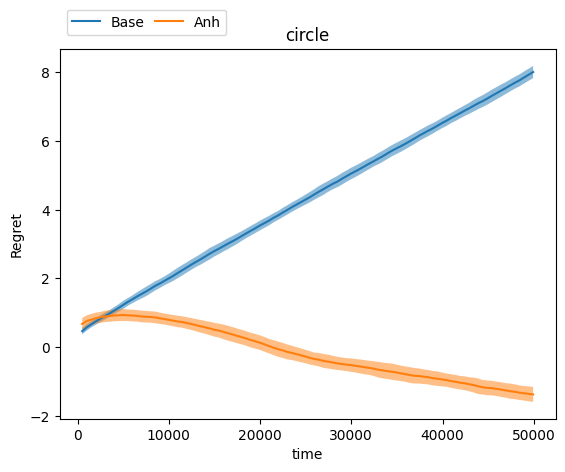

square 30063


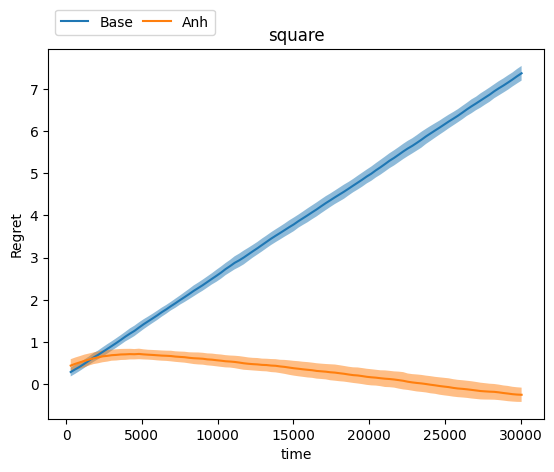

triangle 20003


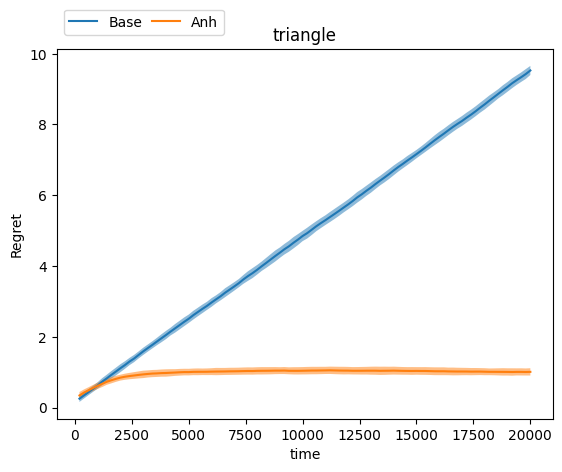

green 59890


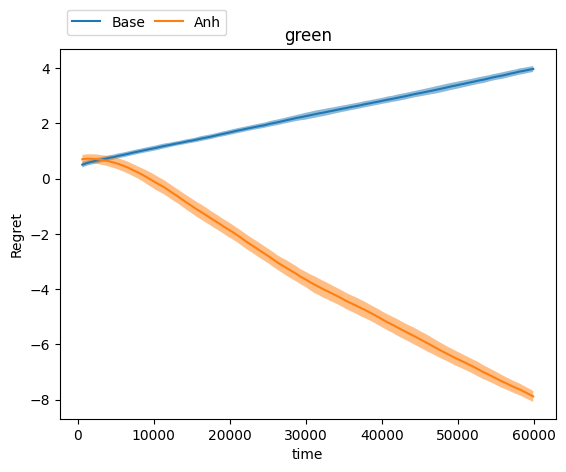

red 30063


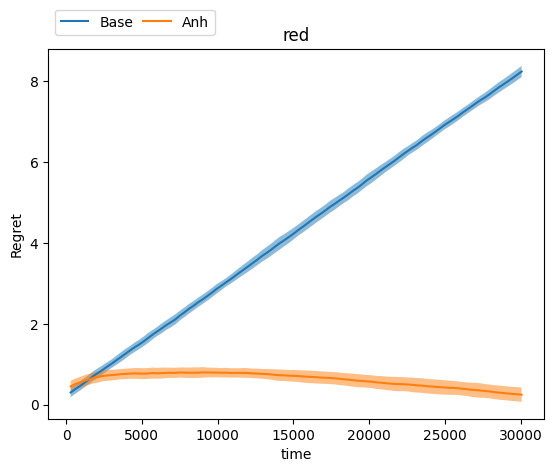

blue 10047


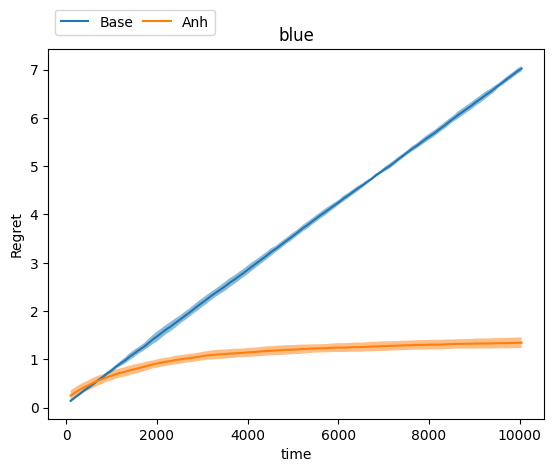

rough 59927


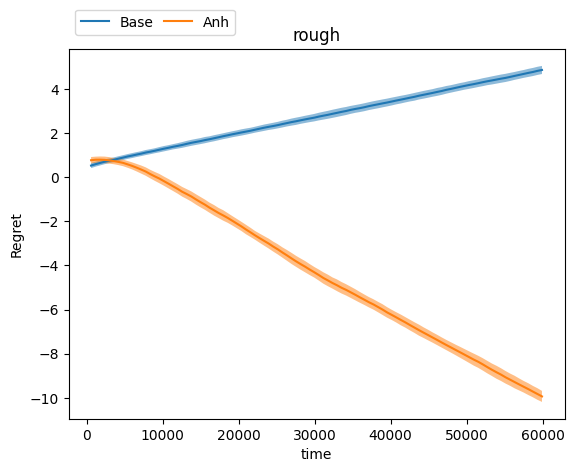

smooth 40073


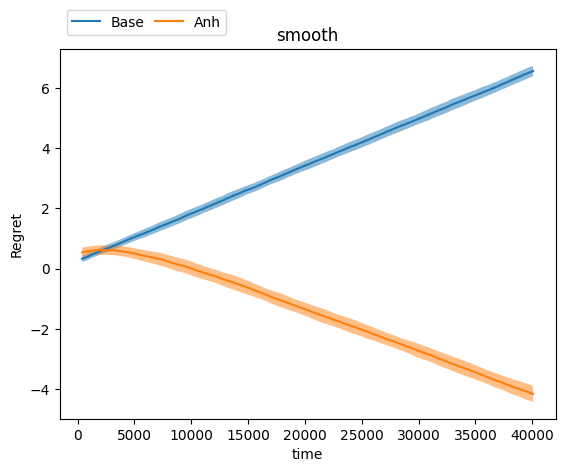

always_on 100000


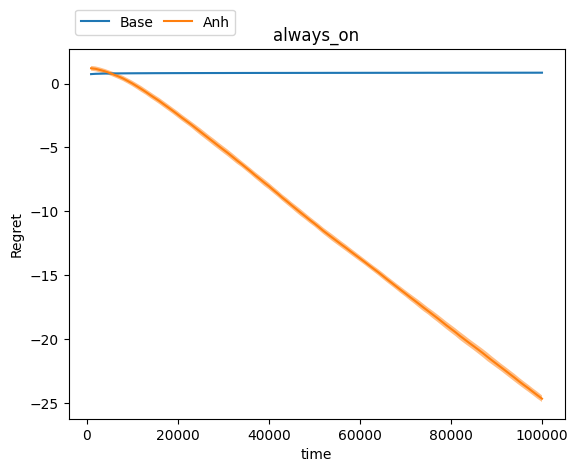

circle 49934


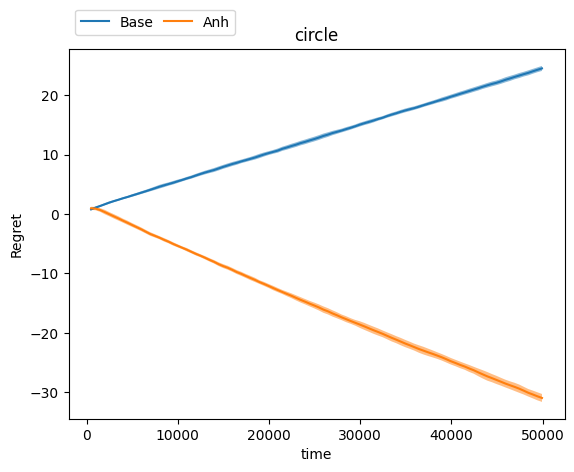

square 30063


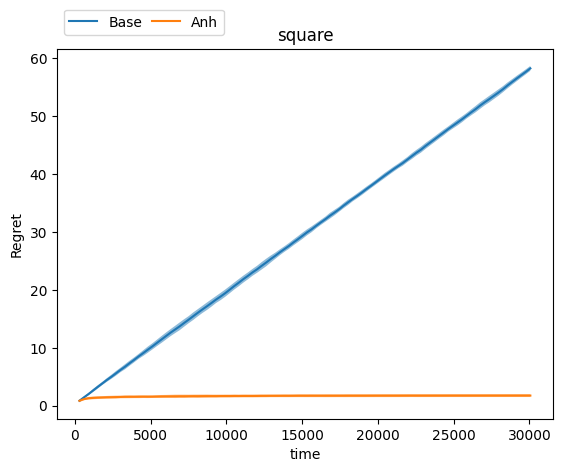

triangle 20003


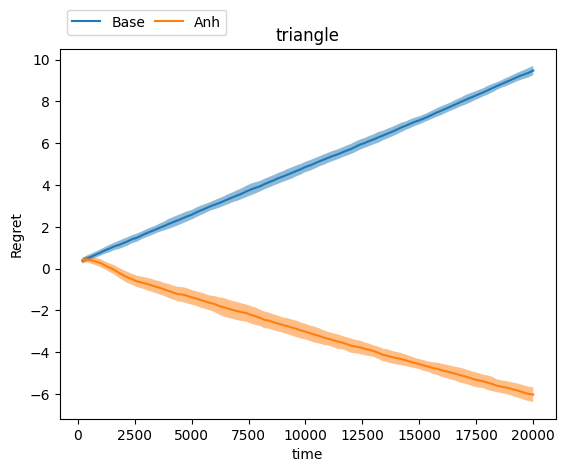

green 59890


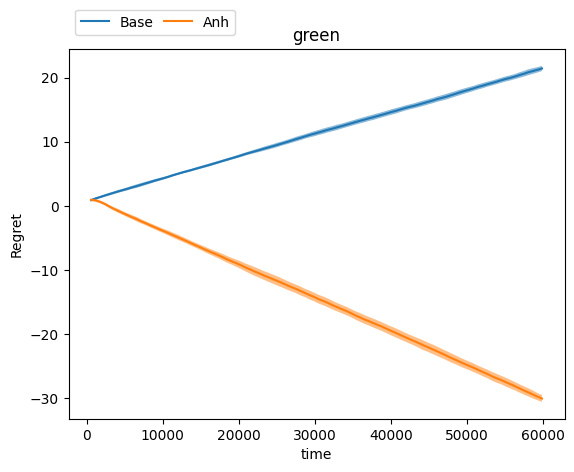

red 30063


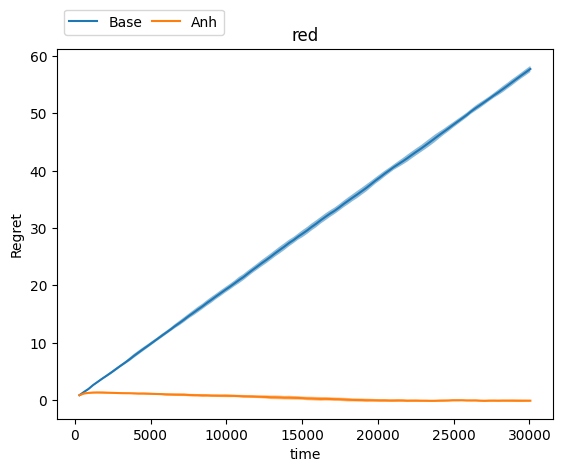

blue 10047


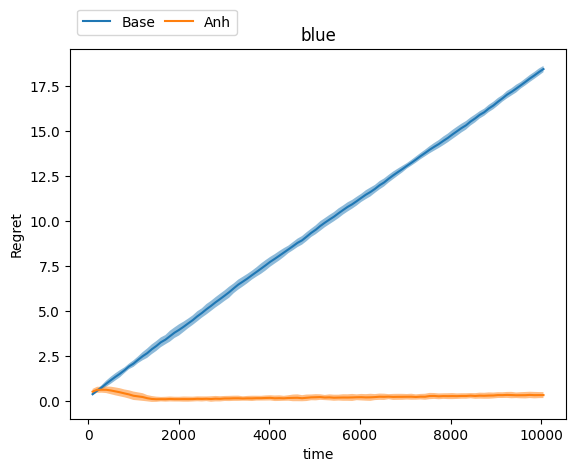

rough 59927


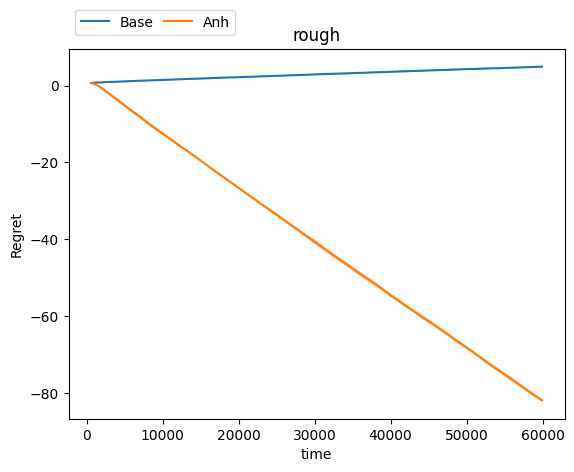

smooth 40073


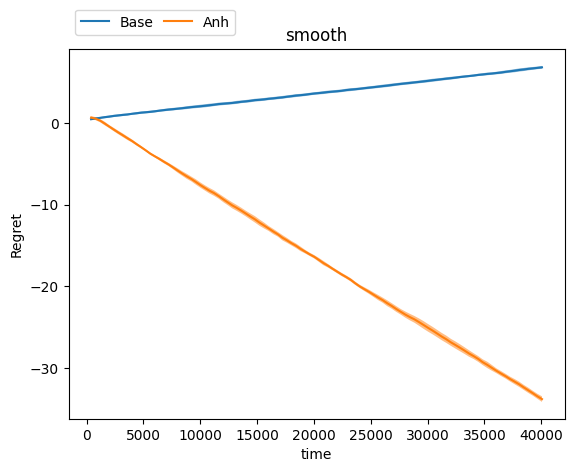

always_on 100000


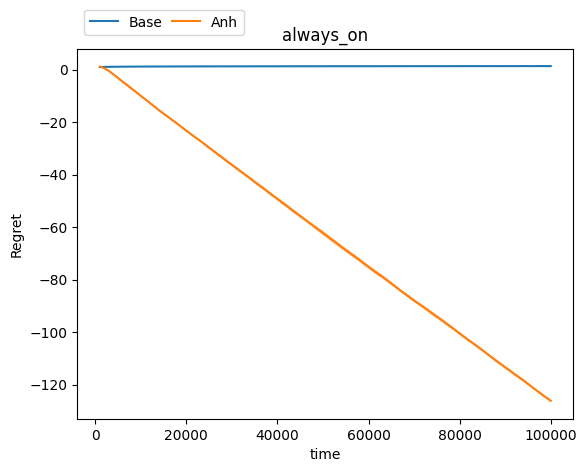

circle 49934


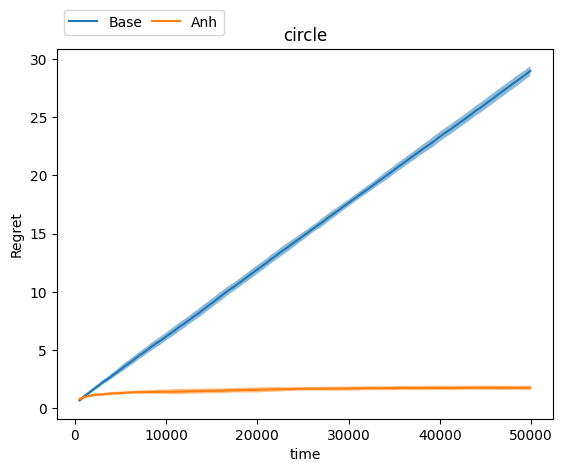

square 30063


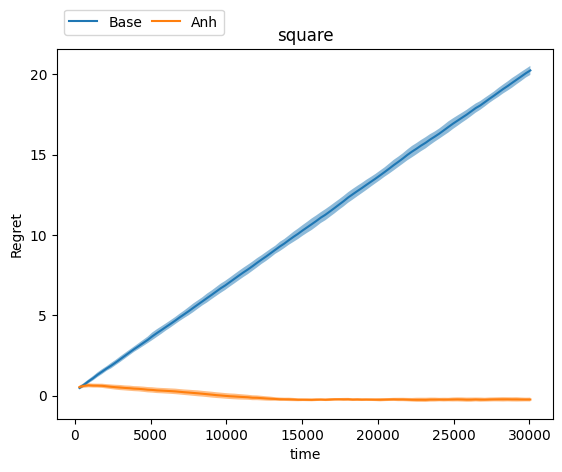

triangle 20003


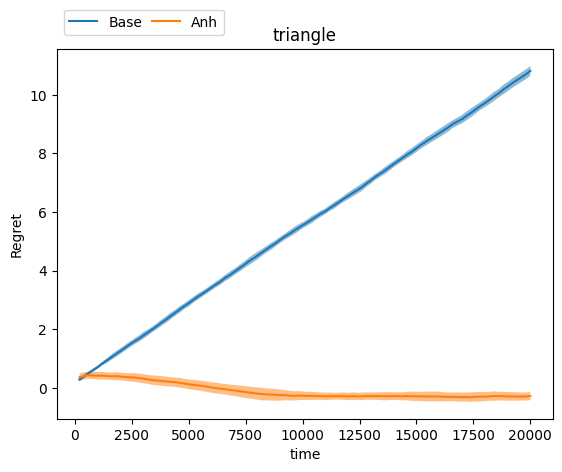

green 59890


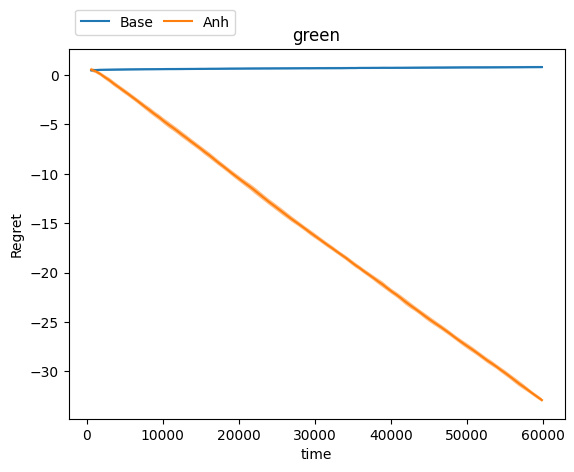

red 30063


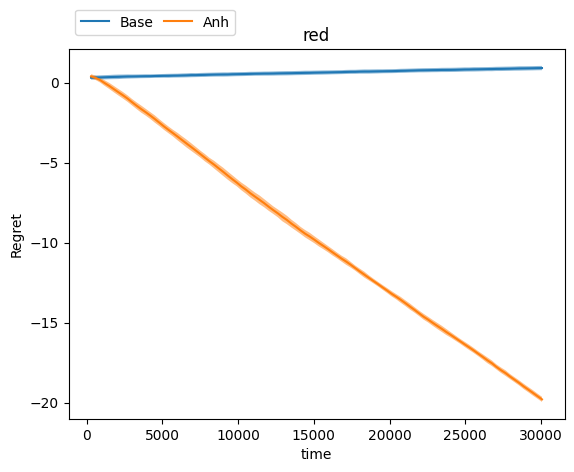

blue 10047


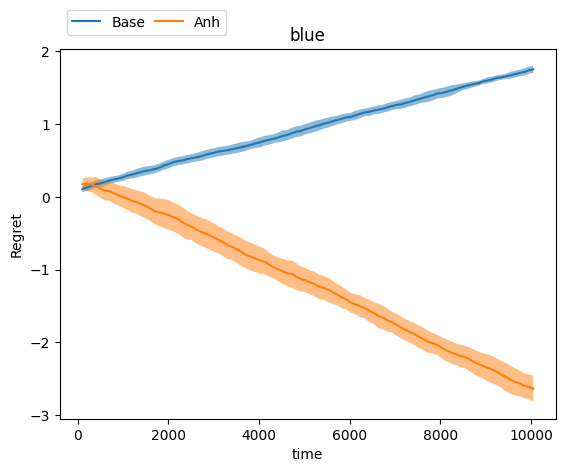

rough 59927


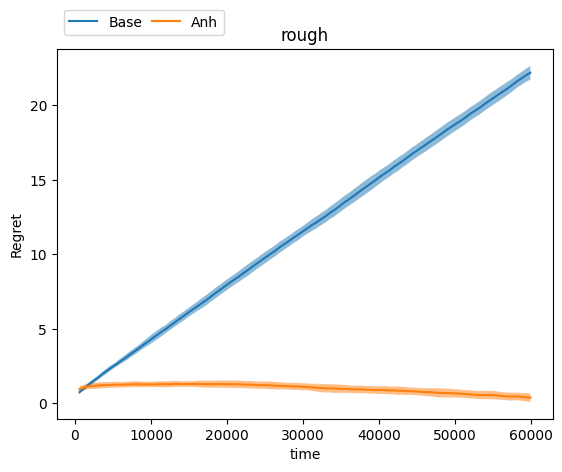

smooth 40073


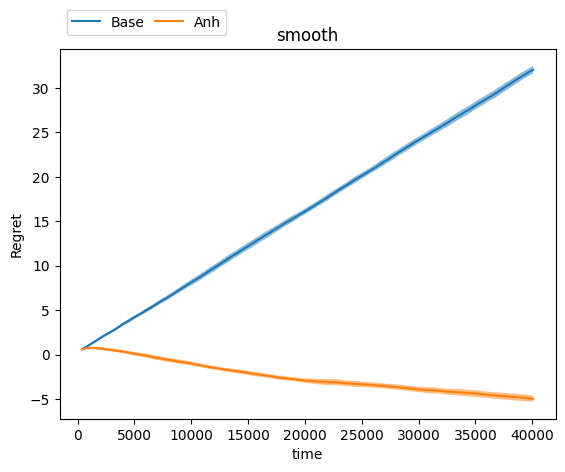

always_on 100000


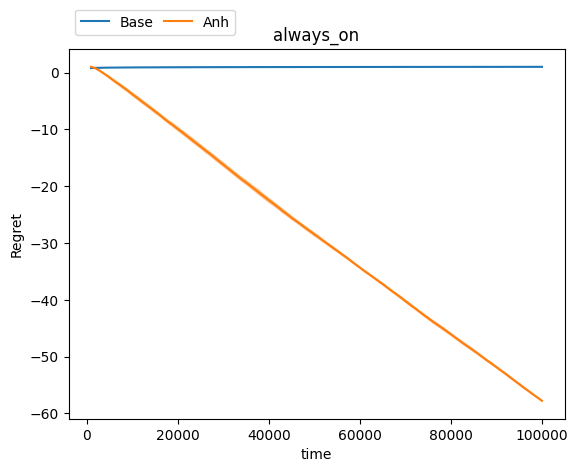

circle 49934


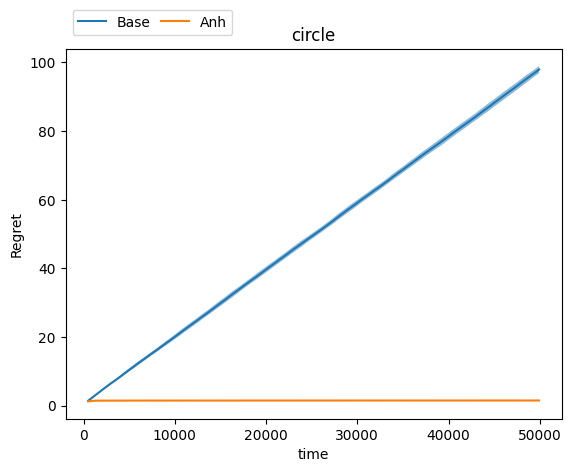

square 30063


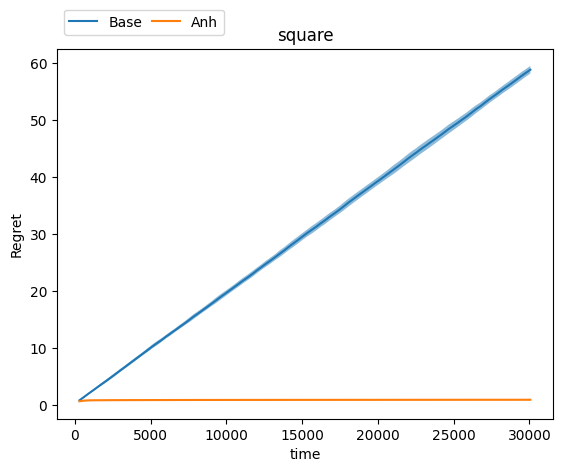

triangle 20003


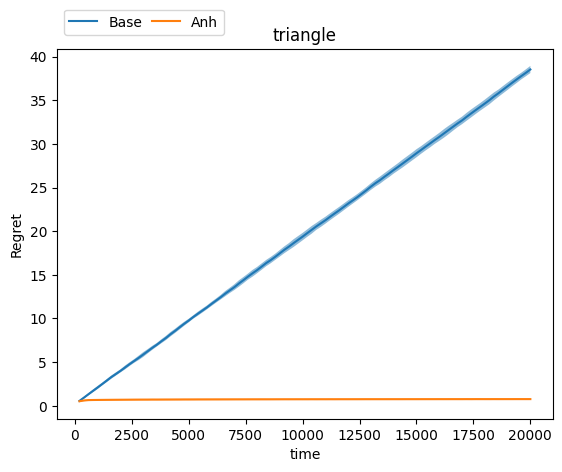

green 59890


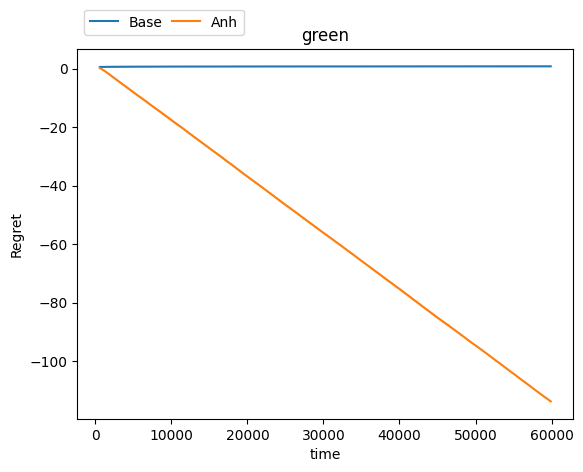

red 30063


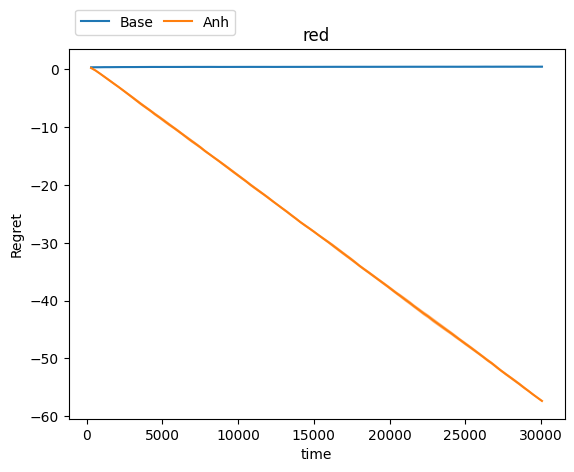

blue 10047


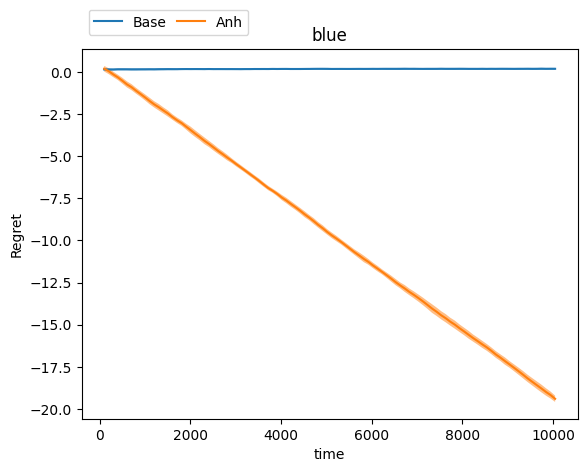

rough 59927


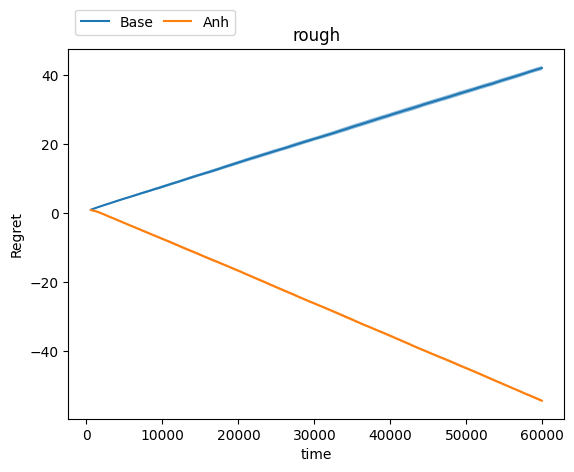

smooth 40073


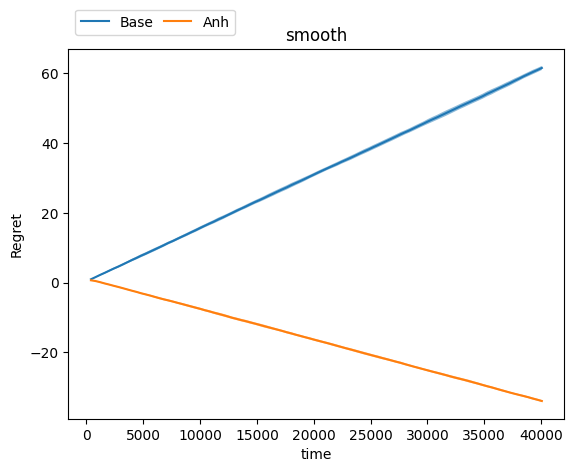

always_on 100000


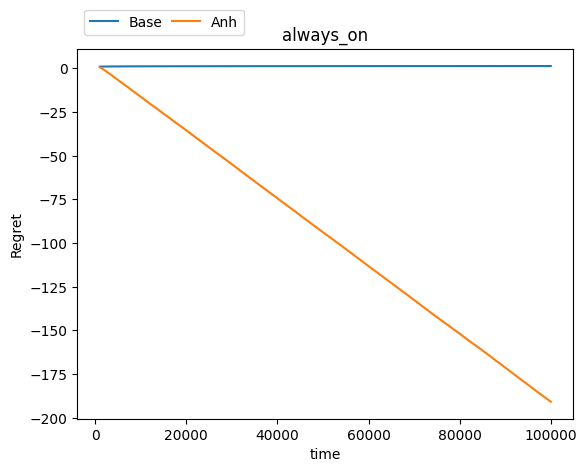

In [35]:
ds_ymean = load_ob('syn_ymean_neutral_seed42.pickle')
plot_regret_curve_with_std(ds_ymean, 'synth_ymean_neutral_altprob')

ds_ymin = load_ob('syn_ymin_neutral_seed42.pickle')
plot_regret_curve_with_std(ds_ymin, 'synth_ymin_neutral_altprob')

ds_ymax = load_ob('syn_ymax_neutral_seed42.pickle')
plot_regret_curve_with_std(ds_ymax, 'synth_ymax_neutral_altprob')

ds_ydperm = load_ob('syn_ydperm_neutral_seed42.pickle')
plot_regret_curve_with_std(ds_ydperm, 'synth_ydperm_neutral_altprob')